In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [3]:
# Camera
camera_path="datasets/movi_a/kubric_128x128_processed_mix_3d/0000/0000_camera.npy"
camera=np.load(camera_path, allow_pickle=True).item() 
print("camera['intrinsics'] shape:",camera['intrinsics'].shape)
print("camera['camera2world_matrix'] shape:",camera['camera2world_matrix'].shape)


camera['intrinsics'] shape: (24, 3, 3)
camera['camera2world_matrix'] shape: (24, 4, 4)


In [4]:
# Video frames
video_path = "datasets/movi_a/kubric_128x128_processed_mix_3d/0000/video_frames/"
frames = sorted(os.listdir(video_path))
video_frames = [np.array(Image.open(os.path.join(video_path, frame))) for frame in frames]

In [5]:
# Dense tracking
dense_tracking_path = "datasets/movi_a/kubric_128x128_processed_mix_3d/0000/0000_dense_tracking.npy"
dense_tracking = np.load(dense_tracking_path, allow_pickle=True).item()
coords = dense_tracking['coords']
print("dense_tracking['coords'] shape:", coords.shape)
print("dense_tracking['queries'] shape:", dense_tracking['queries'].shape)

# Reverse dense tracking
reverse_dense_tracking_path = "datasets/movi_a/kubric_128x128_processed_mix_3d/0000/0000_dense_reverse_tracking.npy"
reverse_dense_tracking = np.load(reverse_dense_tracking_path, allow_pickle=True).item()
reverse_coords = reverse_dense_tracking['coords']
print("reverse_dense_tracking['coords'] shape:", reverse_coords.shape)
print("reverse_dense_tracking['queries'] shape:", reverse_dense_tracking['queries'].shape)

# Sparse tracking
sparse_tracking_path = "datasets/movi_a/kubric_128x128_processed_mix_3d/0000/0000_sparse_tracking.npy"
sparse_tracking = np.load(sparse_tracking_path, allow_pickle=True).item()
sparse_coords = sparse_tracking['coords']
print("sparse_tracking['coords'] shape:", sparse_coords.shape)
print("sparse_tracking['queries'] shape:", sparse_tracking['queries'].shape)



dense_tracking['coords'] shape: (16384, 24, 2)
dense_tracking['queries'] shape: (16384, 3)
reverse_dense_tracking['coords'] shape: (16384, 24, 2)
reverse_dense_tracking['queries'] shape: (16384, 3)
sparse_tracking['coords'] shape: (2048, 24, 2)
sparse_tracking['queries'] shape: (2048, 3)


In [7]:
# Optical flow
optical_path = "datasets/movi_a/kubric_128x128_processed_mix_3d/0000/0000_optical_flow.npy"
optical_flow = np.load(optical_path, allow_pickle=True).item()
backward_flow = optical_flow['backward_flow']
forward_flow = optical_flow['forward_flow']
print("optical_flow['backward_flow'] shape:", backward_flow.shape)
print("optical_flow['forward_flow'] shape:", forward_flow.shape)

optical_flow['backward_flow'] shape: (24, 128, 128, 2)
optical_flow['forward_flow'] shape: (24, 128, 128, 2)


In [ ]:
# Visualize tracking
for frame_idx, frame in enumerate(video_frames):
    plt.figure(figsize=(8, 8))
    plt.imshow(frame)
    
    points = sparse_coords[:, frame_idx] 
    plt.scatter(points[:, 0], points[:, 1], s=5, c=np.arange(points.shape[0]), cmap='hsv', alpha=0.8)
    
    plt.title(f"Frame {frame_idx}")
    plt.axis("off")
    plt.show()

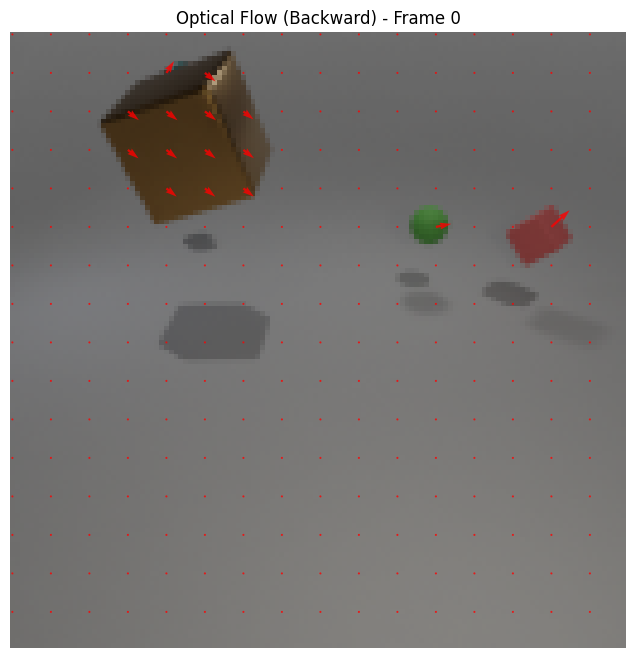

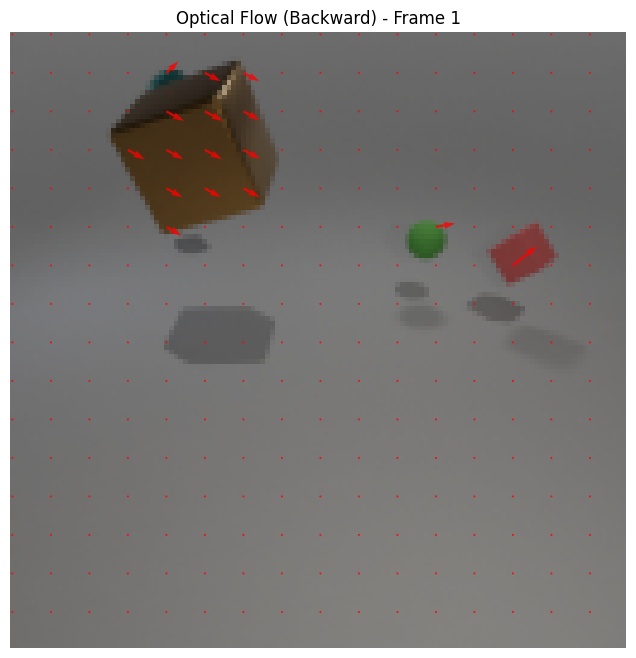

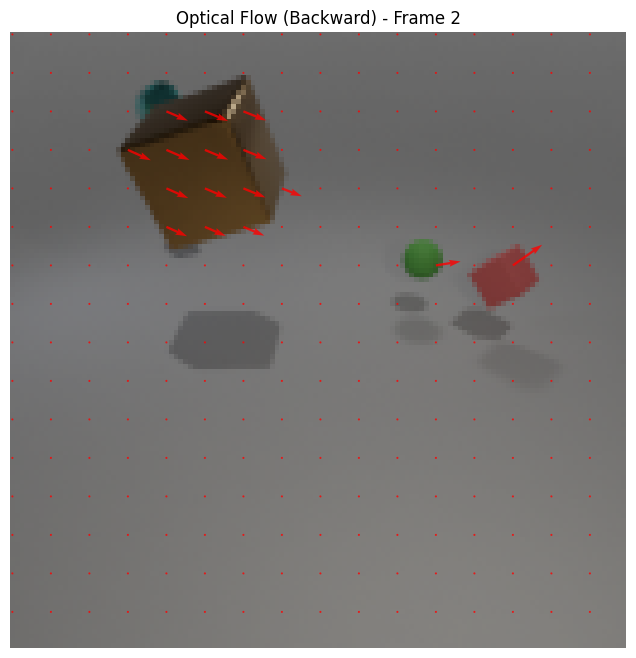

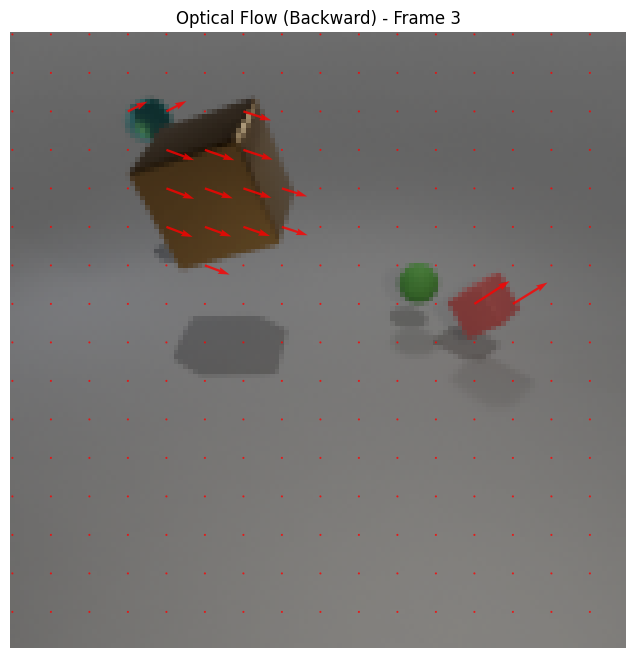

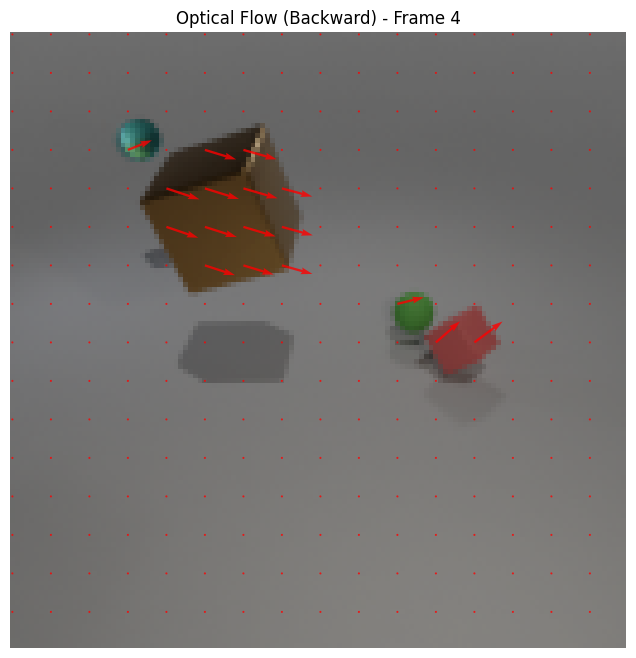

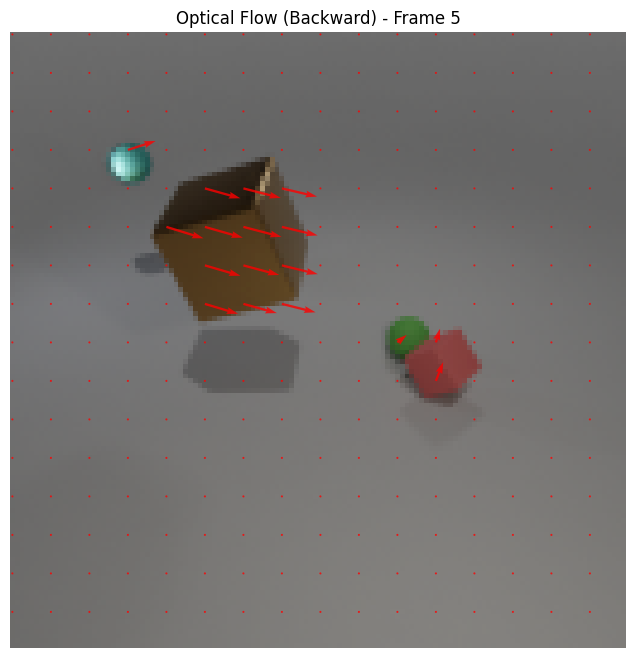

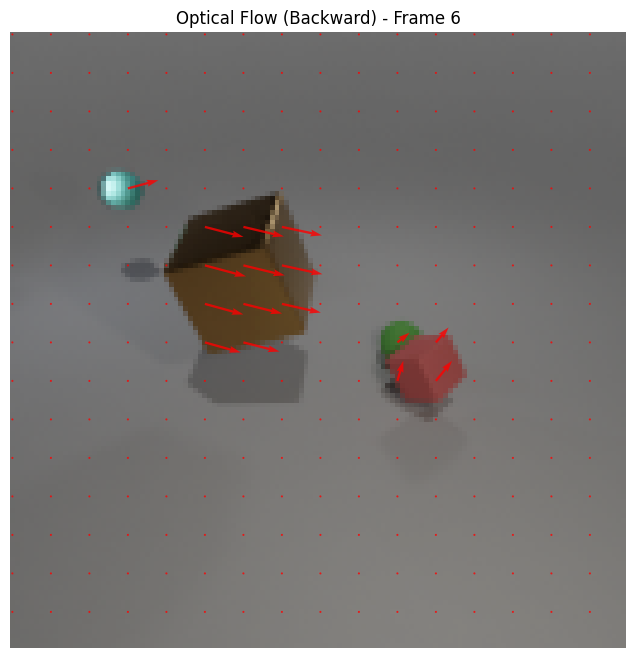

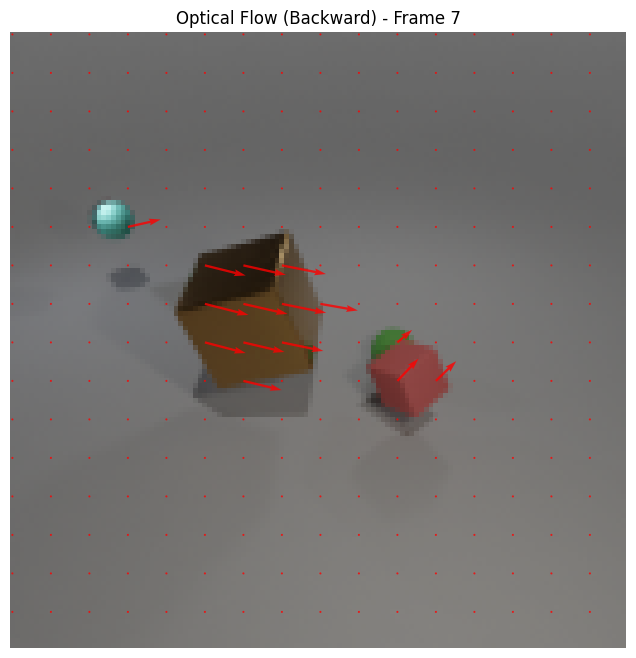

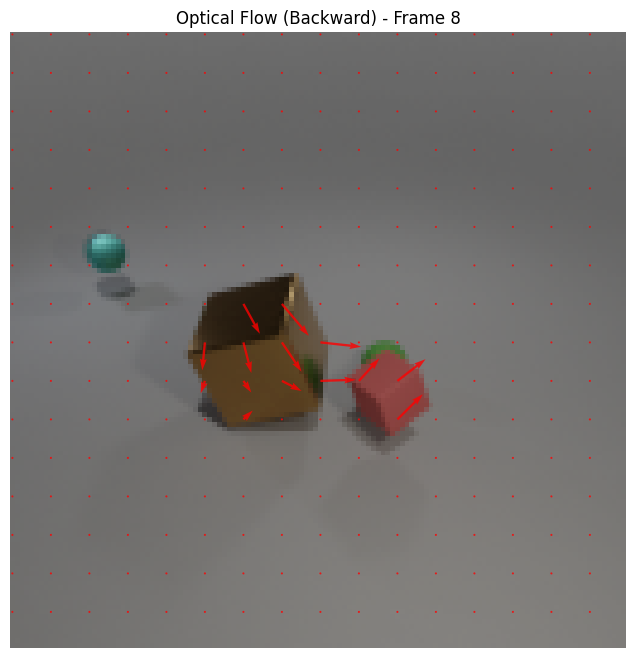

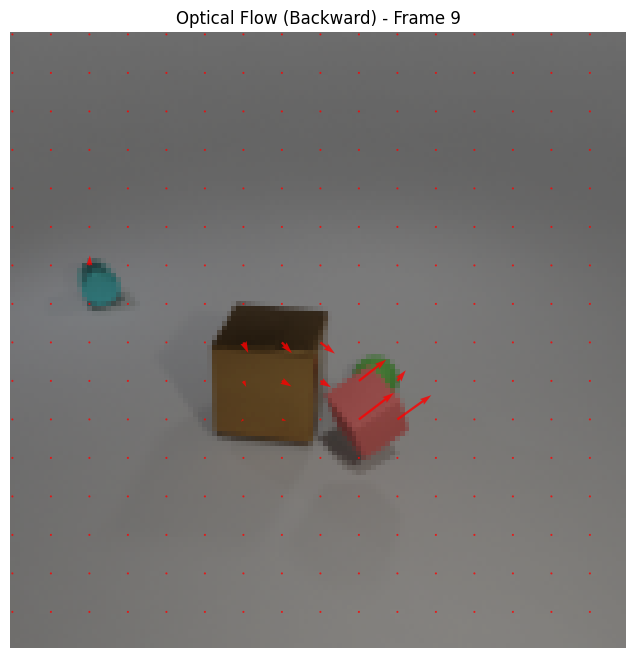

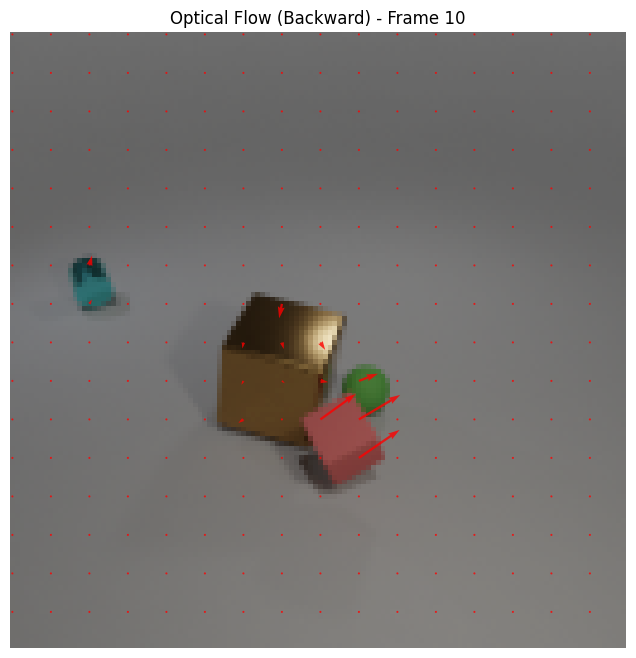

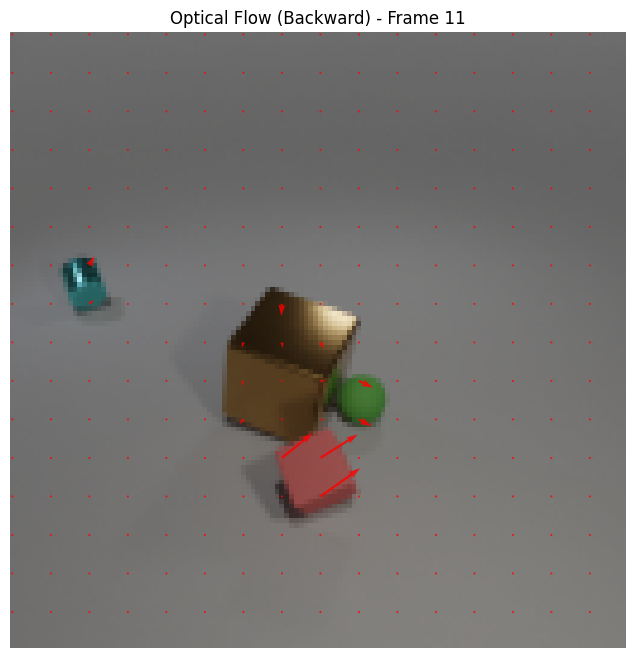

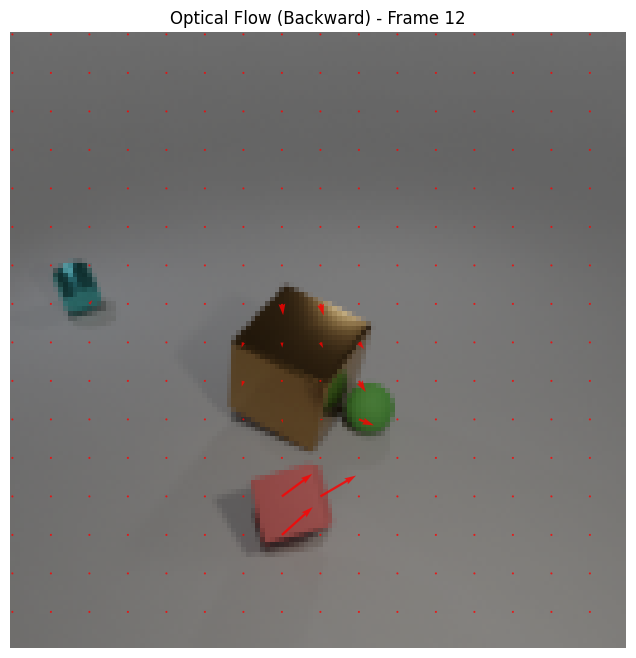

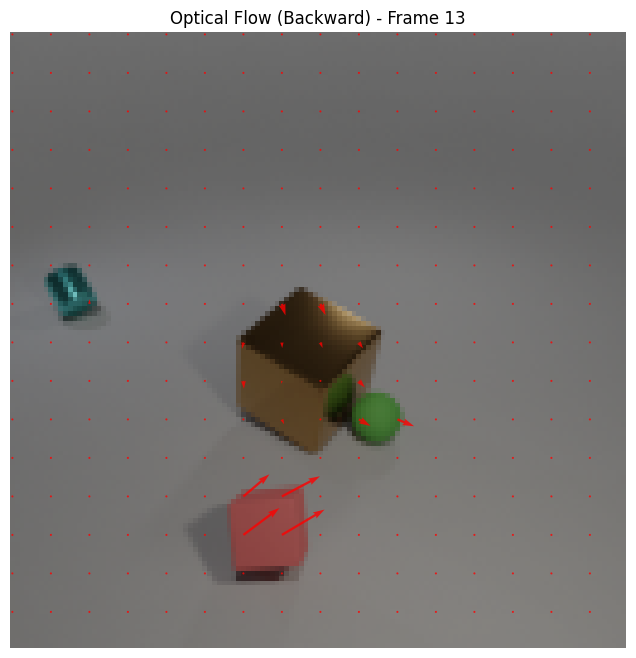

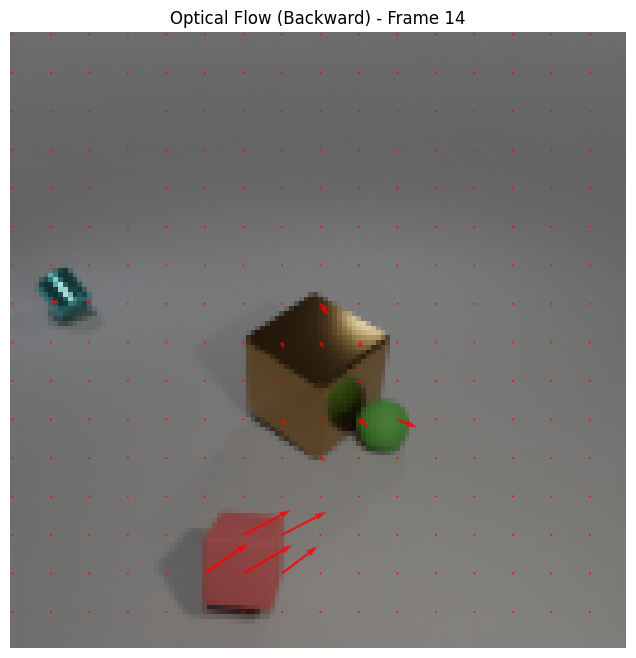

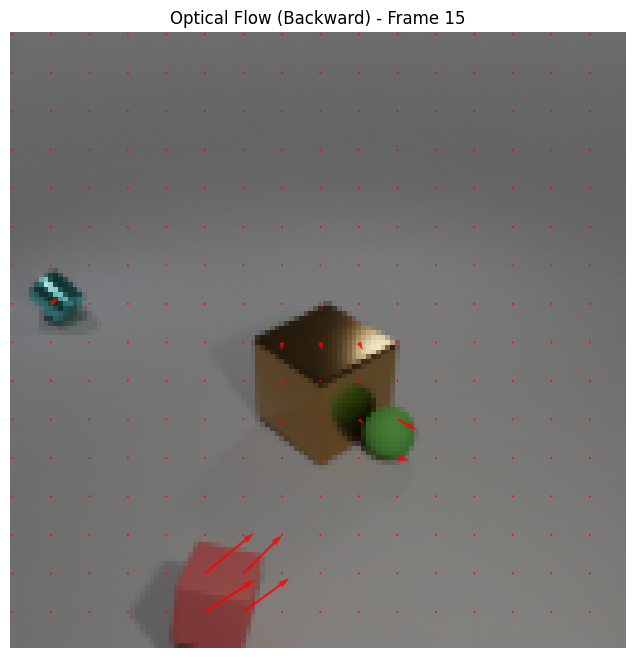

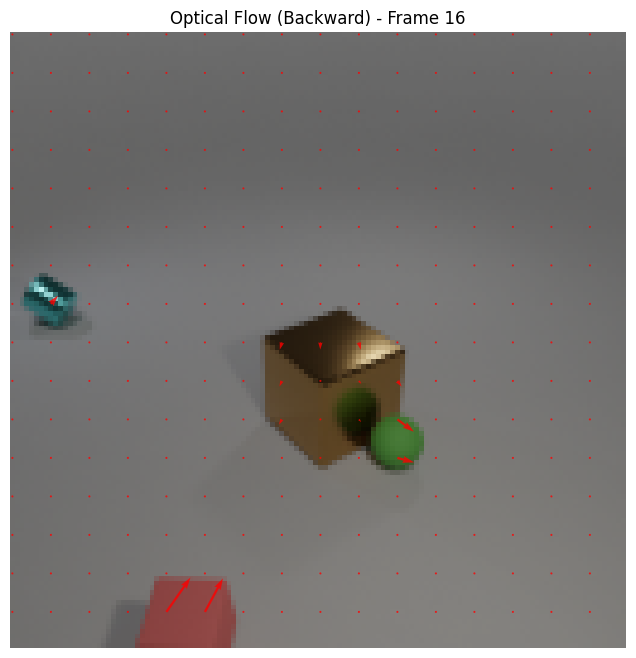

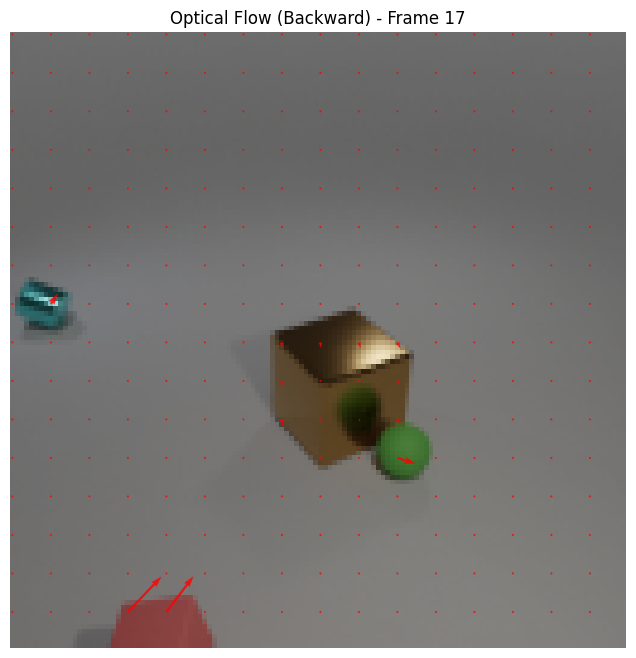

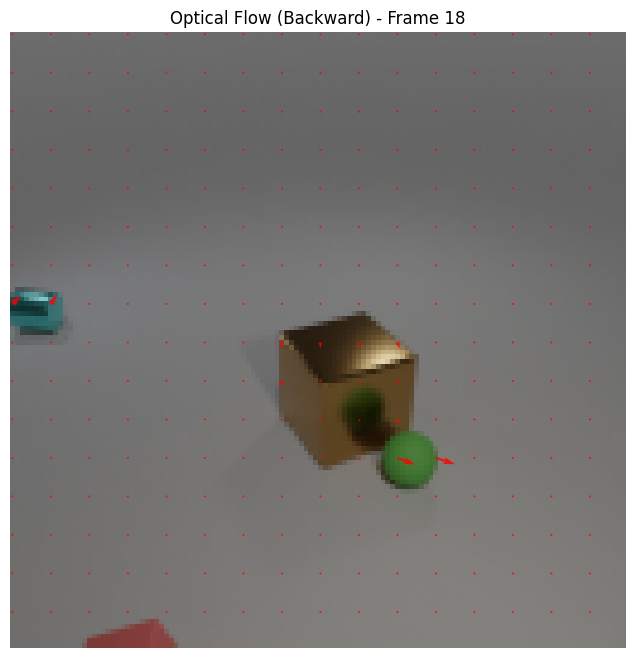

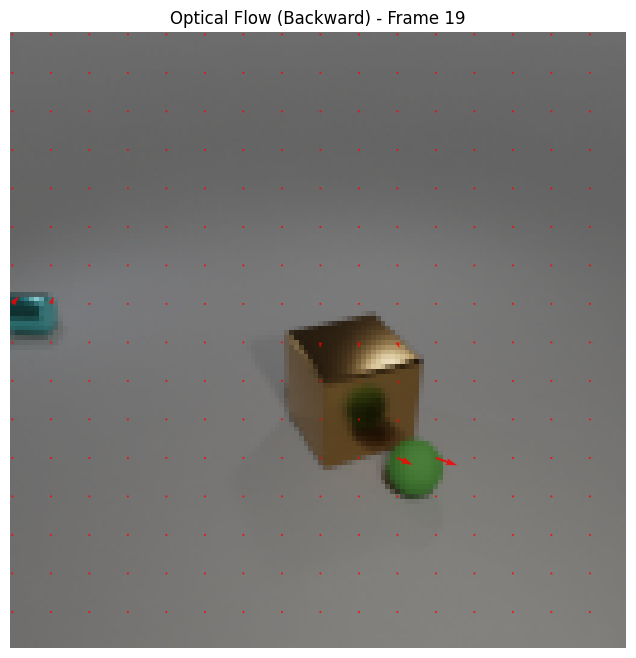

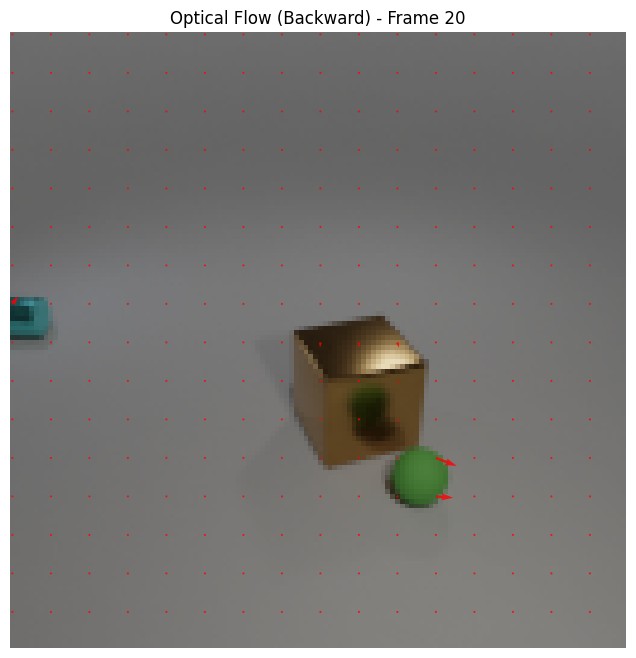

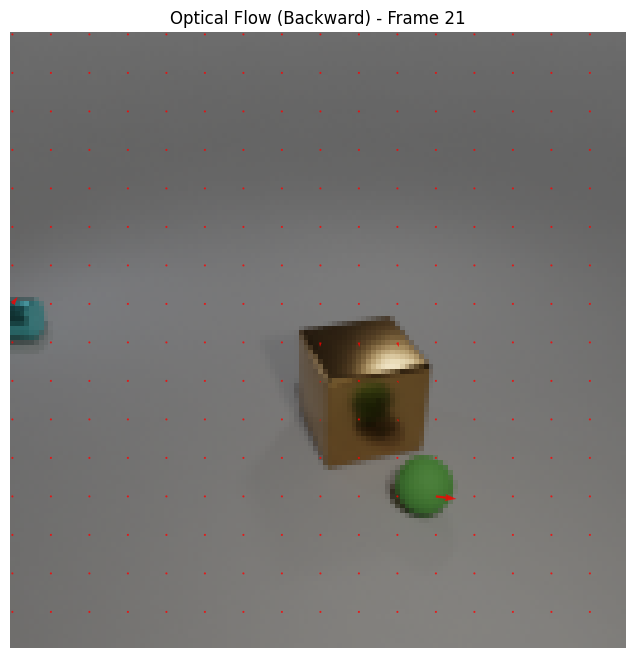

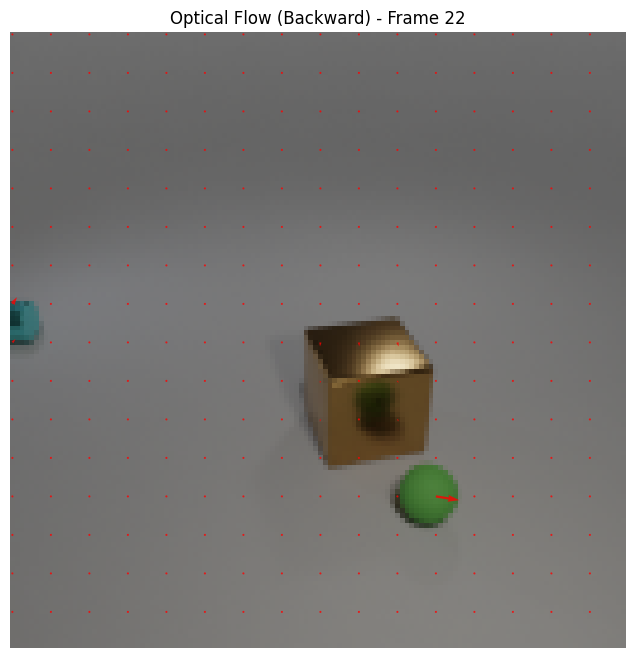

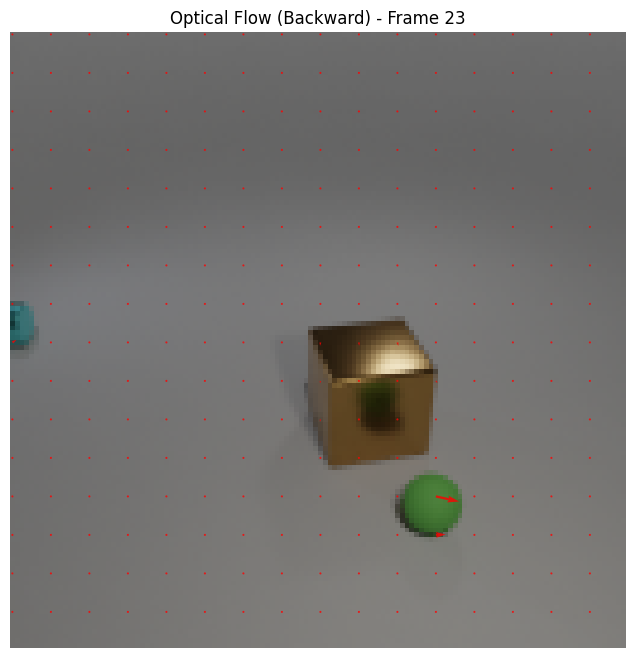

In [11]:
stride = 8  # Step size for arrows
for frame_idx, frame in enumerate(video_frames):
    plt.figure(figsize=(8, 8))
    plt.imshow(frame)
    
    flow = forward_flow[frame_idx]  # Optical flow for the current frame
    h, w, _ = flow.shape
    
    # Create a grid for arrows
    y, x = np.meshgrid(np.arange(0, h, stride), np.arange(0, w, stride), indexing='ij')
    u = flow[::stride, ::stride, 0]  # Horizontal flow
    v = flow[::stride, ::stride, 1]  # Vertical flow
    
    plt.quiver(x, y, u, v, color='red', angles='xy', scale_units='xy', scale=1, alpha=0.8)
    
    plt.title(f"Optical Flow (Backward) - Frame {frame_idx}")
    plt.axis("off")
    plt.show()